In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Reading data

In [14]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
b_count = pd.read_csv('../data/bicycle count/bonn-bicycle-counts-2015-2021.csv', parse_dates=['Date'],
                      date_parser=custom_date_parser)
weather = pd.read_csv('../data/weather history/weather-cologne-bonn-history-2000-2021.csv')
weather.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
weather['date'] = pd.to_datetime(weather['date'], format="%Y-%m-%d %H:%M:%S")

### Data exploration

In [15]:
b_count.describe(include='all')

/var/folders/h4/jw69hv4d7w968_3ddgwxzt8h0000gn/T/ipykernel_1846/3253902918.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  b_count.describe(include='all')


,Date,Value,Counter,Latitude,Longitude,InstallationDate,CounterName
count,848924,794762.000000,848924,848924.000000,848924.000000,848924,848924
unique,59385,NaN,15,NaN,NaN,13,15
top,2021-03-28 03:00:00,NaN,5.01 BN,NaN,NaN,2015-05-15,Kennedybrücke (Nordseite)
freq,30,NaN,59386,NaN,NaN,118772,59386
first,2015-03-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,67.039763,NaN,50.729658,7.119557,NaN,NaN
std,NaN,97.134573,NaN,0.023702,0.031888,NaN,NaN
min,NaN,0.000000,NaN,50.670912,7.068538,NaN,NaN
25%,NaN,4.000000,NaN,50.717193,7.101341,NaN,NaN


In [17]:
weather.describe(include='all')

/var/folders/h4/jw69hv4d7w968_3ddgwxzt8h0000gn/T/ipykernel_1846/3114980146.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  weather.describe(include='all')


,date,GroundTempCelsius,WindSpeedMeterPerSec,PrecipitationHeightMillimeter,SunshineMinutes,AirTempCelsius,RelHumidityPercent
count,192864,181244.000000,192685.000000,192641.000000,144262.000000,192864.000000,192860.000000
unique,192864,NaN,NaN,NaN,NaN,NaN,NaN
top,2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,12.295538,3.218732,0.089737,14.598176,10.950416,76.174220
std,NaN,8.479410,1.694187,0.520861,22.611096,7.453838,17.569492
min,NaN,-7.400000,0.000000,0.000000,0.000000,-18.900000,12.000000
25%,NaN,5.400000,1.900000,0.000000,0.000000,5.500000,65.000000


In [99]:
# Dropping elements that are NaN because they didn't register anything maybe due to a malfunction
b_count_ = b_count.dropna()

In [113]:
lower_date = '2015-03-24 00:00:00'
upper_date = '2021-12-31 23:00:00'
# We are deleting the elements that are not in the range of data that we have available in both datasets
filtered_bike_count = b_count_[(b_count_['Date'] >= lower_date) & (b_count_['Date'] <= upper_date)][['Date', 'Value']]
filtered_bike_count.shape[0], b_count.shape[0], abs(filtered_bike_count.shape[0] - b_count.shape[0])

(794762, 848924, 54162)

In [114]:
filtered_bike_count = filtered_bike_count.groupby(pd.Grouper(key='Date', freq='H')).sum()
filtered_bike_count = filtered_bike_count.reset_index(level=0)
filtered_bike_count

,Date,Value
0,2015-03-24 00:00:00,0.0
1,2015-03-24 01:00:00,0.0
2,2015-03-24 02:00:00,0.0
3,2015-03-24 03:00:00,0.0
4,2015-03-24 04:00:00,0.0
...,...,...
59395,2021-12-31 19:00:00,375.0
59396,2021-12-31 20:00:00,165.0
59397,2021-12-31 21:00:00,166.0
59398,2021-12-31 22:00:00,81.0


In [115]:
weather_ = weather.dropna()

In [116]:
# We are deleting the elements that are not in the range of data that we have available in both datasets
filtered_weather = weather_[(weather_['date'] >= lower_date) & (weather_['date'] <= upper_date)]
filtered_weather.shape[0], weather.shape[0], abs(filtered_weather.shape[0] - weather.shape[0])

(44257, 192864, 148607)

### Visualization of data

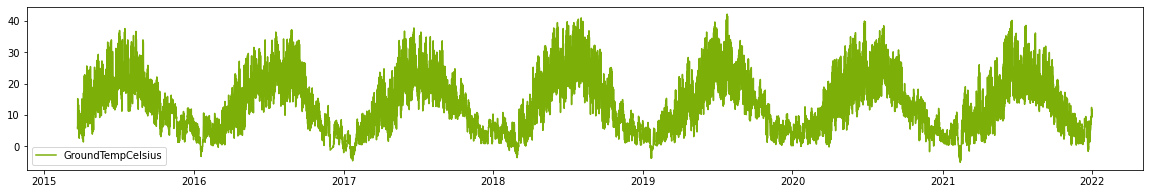

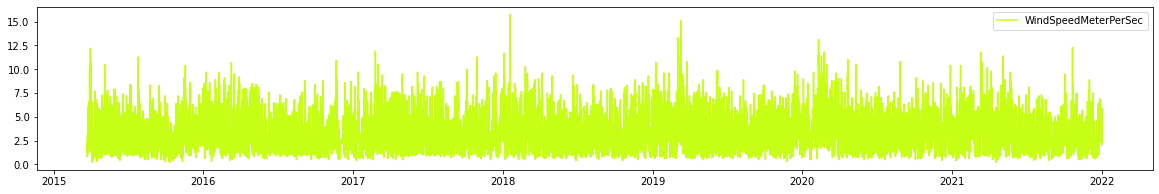

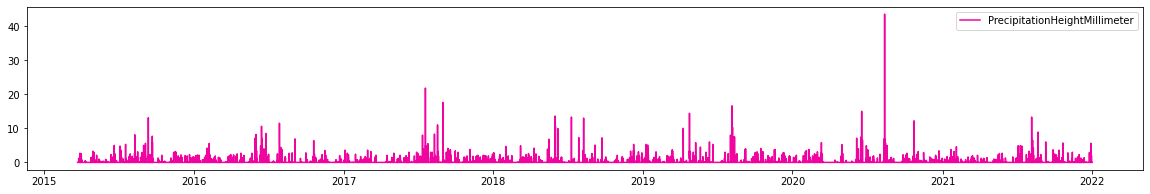

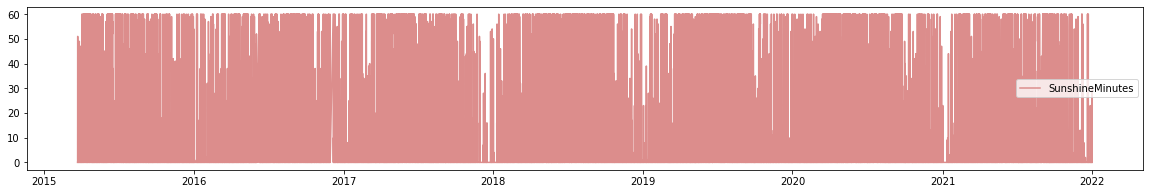

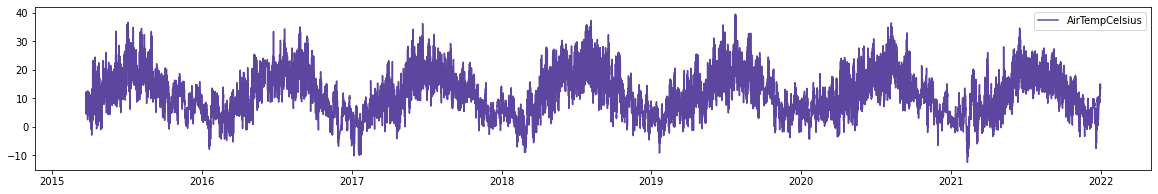

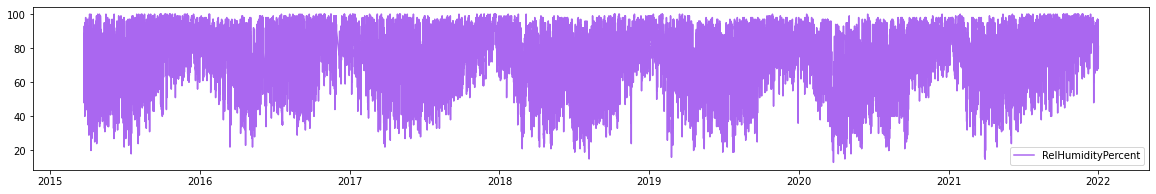

In [117]:
from numpy.random import random

elems = filtered_weather.columns[filtered_weather.columns != 'date']
for column in elems:
    plt.figure(figsize=(20, 3))
    plt.plot(filtered_weather['date'], filtered_weather[column], label=column, color=(random(), random(), random()))
    plt.legend()
plt.show()

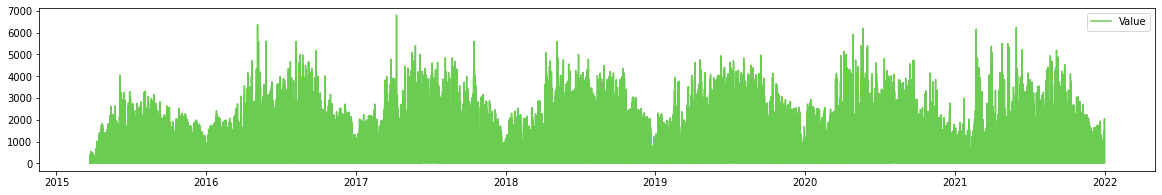

In [118]:
elems = filtered_bike_count.columns[filtered_bike_count.columns != 'Date']
plt.figure(figsize=(20, 3))
plt.plot(filtered_bike_count['Date'], filtered_bike_count['Value'], label='Value', color=(random(), random(), random()))
plt.legend()
plt.show()

### Combining datasets

In [119]:
print('The sizes of our datasets', filtered_bike_count.shape, filtered_weather.shape)

The sizes of our datasets (59400, 2) (44257, 7)


In [123]:
final_dataset = filtered_bike_count.merge(filtered_weather, how='left', left_on='Date', right_on='date')
final_dataset.describe(include='all')

/var/folders/h4/jw69hv4d7w968_3ddgwxzt8h0000gn/T/ipykernel_1846/538913246.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  final_dataset.describe(include='all')
/var/folders/h4/jw69hv4d7w968_3ddgwxzt8h0000gn/T/ipykernel_1846/538913246.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  final_dataset.describe(include='all')


,Date,Value,date,GroundTempCelsius,WindSpeedMeterPerSec,PrecipitationHeightMillimeter,SunshineMinutes,AirTempCelsius,RelHumidityPercent
count,59400,59400.000000,44257,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000
unique,59400,NaN,44257,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-03-24 00:00:00,NaN,2015-03-24 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-03-24 00:00:00,NaN,2015-03-24 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-31 23:00:00,NaN,2021-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,896.980741,NaN,13.639641,3.442603,0.087656,15.264817,12.229114,72.367287
std,NaN,963.482624,NaN,8.934472,1.778891,0.523746,23.017865,7.644813,18.937298
min,NaN,0.000000,NaN,-5.100000,0.200000,0.000000,0.000000,-12.500000,13.000000
25%,NaN,109.000000,NaN,6.300000,2.100000,0.000000,0.000000,6.400000,59.000000


In [128]:
#We are looking to see the values that are missing and it shows a pattern that the weather dataset is not giving accurate information from 21 - 02h in every day.
final_dataset[final_dataset['date'].isnull().values]

,Date,Value,date,GroundTempCelsius,WindSpeedMeterPerSec,PrecipitationHeightMillimeter,SunshineMinutes,AirTempCelsius,RelHumidityPercent
0,2015-03-24 00:00:00,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-03-24 01:00:00,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-03-24 02:00:00,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
21,2015-03-24 21:00:00,109.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
22,2015-03-24 22:00:00,99.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
59377,2021-12-31 01:00:00,56.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
59378,2021-12-31 02:00:00,43.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
59397,2021-12-31 21:00:00,166.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
59398,2021-12-31 22:00:00,81.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# We drop these na values
final_dataset = final_dataset.dropna()
final_dataset = final_dataset.drop(columns=['date'], axis=1)
final_dataset.describe(include='all')

/var/folders/h4/jw69hv4d7w968_3ddgwxzt8h0000gn/T/ipykernel_1846/4228464488.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  final_dataset.describe(include='all')


,Date,Value,GroundTempCelsius,WindSpeedMeterPerSec,PrecipitationHeightMillimeter,SunshineMinutes,AirTempCelsius,RelHumidityPercent
count,44257,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000
unique,44257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-03-24 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-03-24 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1129.576926,13.639641,3.442603,0.087656,15.264817,12.229114,72.367287
std,NaN,998.795746,8.934472,1.778891,0.523746,23.017865,7.644813,18.937298
min,NaN,0.000000,-5.100000,0.200000,0.000000,0.000000,-12.500000,13.000000
25%,NaN,300.000000,6.300000,2.100000,0.000000,0.000000,6.400000,59.000000


### Final visualization

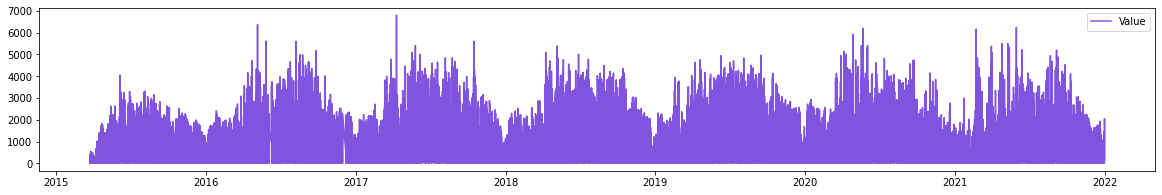

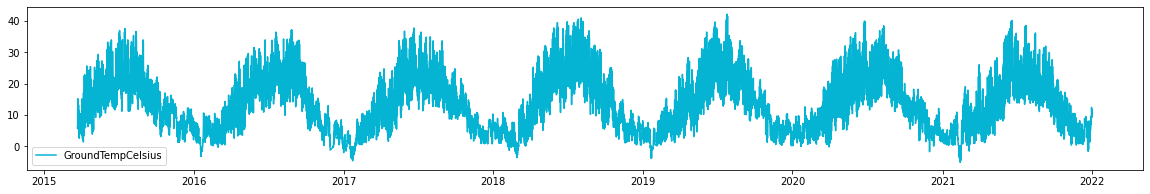

In [136]:
from numpy.random import random

elems = ['Value', 'GroundTempCelsius']
for column in elems:
    plt.figure(figsize=(20, 3))
    plt.plot(final_dataset['Date'], final_dataset[column], label=column, color=(random(), random(), random()))
    plt.legend()
plt.show()

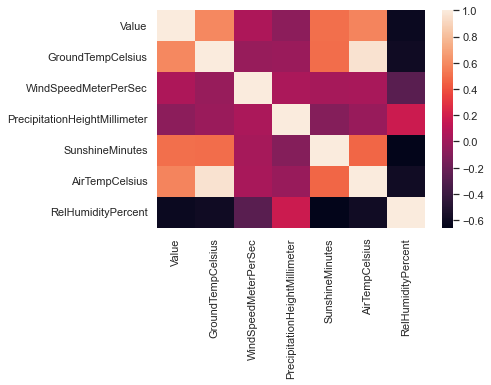

In [142]:
import seaborn as sns
ax = sns.heatmap(final_dataset[final_dataset.columns[final_dataset.columns != 'Date']].corr())